<a href="https://colab.research.google.com/github/Shinhunjun/Data-Analysis_Study/blob/main/22_11_13(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
import pandas as pd

In [5]:
from sklearn.datasets import load_iris

In [6]:
iris = load_iris()

In [9]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [14]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [17]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
df_iris= pd.DataFrame(data, columns=feature_names)

In [19]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
df_iris['target']=target

In [21]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Visualization

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

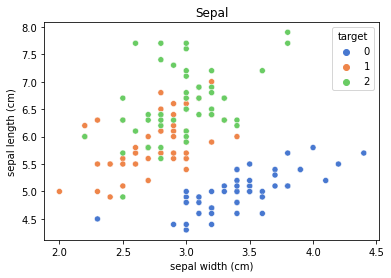

In [24]:
sns.scatterplot('sepal width (cm)', 'sepal length (cm)', hue= 'target', palette = 'muted', data= df_iris)
plt.title('Sepal')
plt.show()

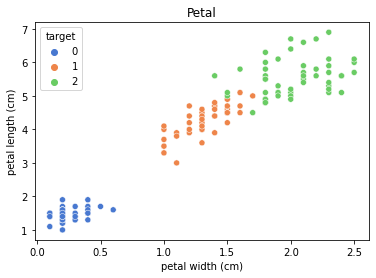

In [25]:
sns.scatterplot('petal width (cm)', 'petal length (cm)', hue= 'target', palette = 'muted', data= df_iris)
plt.title('Petal')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',  1), df_iris['target'])

In [28]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [29]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

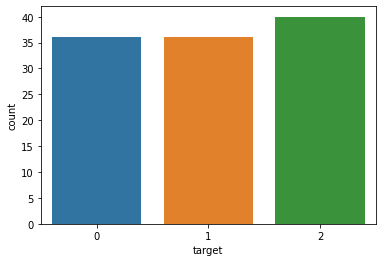

In [30]:
sns.countplot(y_train)

By using stratify -> make the sample even

In [32]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target',  1), df_iris['target'],stratify= df_iris['target'])

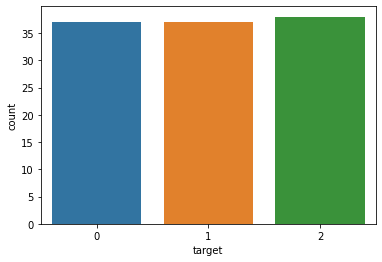

In [33]:
sns.countplot(y_train)

LogisticRegression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr= LogisticRegression()

In [36]:
lr.fit(x_train, y_train)

LogisticRegression()

In [39]:
lr_pred= lr.predict(x_valid)

In [40]:
lr_pred[:5]

array([1, 0, 1, 2, 1])

In [41]:
(lr_pred == y_valid).mean()

1.0

SGD classifier

In [43]:
from sklearn.linear_model import SGDClassifier

In [44]:
sgd =SGDClassifier()

In [45]:
sgd.fit(x_train, y_train)

SGDClassifier()

In [46]:
prediction= sgd.predict(x_valid)

In [47]:
(prediction == y_valid).mean()

0.9736842105263158

Hyper paramaeter Tuning

random_state->make even when tuning
n_jobs= amount of CPU want to use

In [48]:
sgd = SGDClassifier(penalty = 'elasticnet', random_state = 0, n_jobs= -1)

In [49]:
sgd.fit(x_train, y_train)

SGDClassifier(n_jobs=-1, penalty='elasticnet', random_state=0)

In [50]:
prediction = sgd.predict(x_valid)

In [51]:
(prediction == y_valid).mean()

0.6578947368421053

KNeighborsClassifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knc = KNeighborsClassifier()

In [57]:
knc.fit(x_train, y_train)

KNeighborsClassifier()

In [58]:
knc_pred= knc.predict(x_valid)

In [59]:
(knc_pred== y_valid).mean()

0.9736842105263158

SVC

In [60]:
from sklearn.svm import SVC 

In [64]:
svc = SVC(random_state=0)
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_valid)

In [62]:
(svc_pred== y_valid).mean()

1.0

In [63]:
svc_pred[:5]

array([1, 0, 1, 2, 1])

Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [68]:
from sklearn.tree import export_graphviz
from subprocess import call

In [77]:
def graph_tree(model):
    export_graphviz(model, out_file='tree.dot')
    call(['dot','-Tpng', 'tree.dot','-o', 'decistion-tree.png', '-Gdpi=600'])

    return image(filename = 'decistion-tree.png',width= 500)